Plot saved as last_values_plot.png


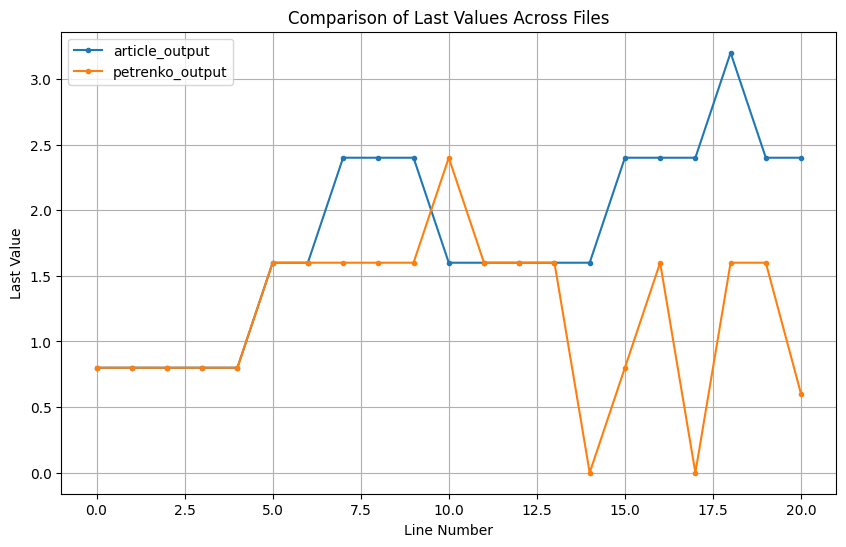

In [4]:
import matplotlib.pyplot as plt
import os

# Configuration
files_to_plot = ["article_output", "petrenko_output"]  # Replace with your filenames
output_image = "last_values_plot.png"
x_label = "Line Number"
y_label = "Last Value"
title = "Comparison of Last Values Across Files"

# Store all data for plotting
all_data = []

# Read each file and extract last values
for filename in files_to_plot:
    try:
        with open(filename, 'r') as f:
            lines = f.readlines()
            last_values = []
            for line in lines:
                if line.strip():  # Skip empty lines
                    values = line.strip().split()
                    if values:  # If line has values
                        last_values.append(float(values[-1]))  # Get last value as float
            
            if last_values:
                all_data.append((filename, last_values))
            else:
                print(f"Warning: No valid data found in {filename}")
                
    except FileNotFoundError:
        print(f"Error: File {filename} not found")
    except Exception as e:
        print(f"Error processing {filename}: {str(e)}")

# Plot all data
plt.figure(figsize=(10, 6))

for filename, values in all_data:
    plt.plot(values, label=os.path.basename(filename), marker='o', linestyle='-', markersize=3)

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.legend()
plt.grid(True)

print(f"Plot saved as {output_image}")
plt.show()